# **Task 1: Exploratory Data Analysis (EDA) and Business Insights**

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
customers = pd.read_csv('/content/Customers.csv')

In [123]:
products = pd.read_csv('/content/Products.csv')

In [124]:
transactions = pd.read_csv('/content/Transactions.csv')

**Data Cleaning**

In [125]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [129]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [131]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [132]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [133]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [134]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


**Checking for missing values**

In [135]:
print("Customers: ", customers.isnull().sum())

Customers:  CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [136]:
print("Products: ", products.isnull().sum())

Products:  ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [137]:
print("Transactions: ", transactions.isnull().sum())

Transactions:  TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


**Exploratory Data Analysis**

In [138]:
print("Customer Summary Statistics:")
print(customers.describe())

Customer Summary Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [139]:
print("Product Summary Statistics:")
print(products.describe())

Product Summary Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [140]:
print("Transaction Summary Statistics:")
print(transactions.describe())

Transaction Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


**Visualizations**

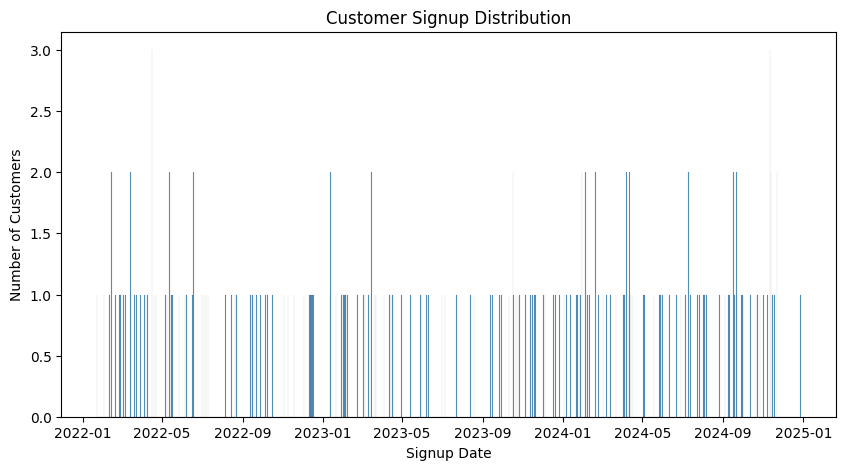

In [141]:
plt.figure(figsize=(10, 5))
sns.histplot(pd.to_datetime(customers['SignupDate']).dt.date, bins=30)
plt.title('Customer Signup Distribution')
plt.xlabel('Signup Date')
plt.ylabel('Number of Customers')
plt.show()

**Product Price Distribution**

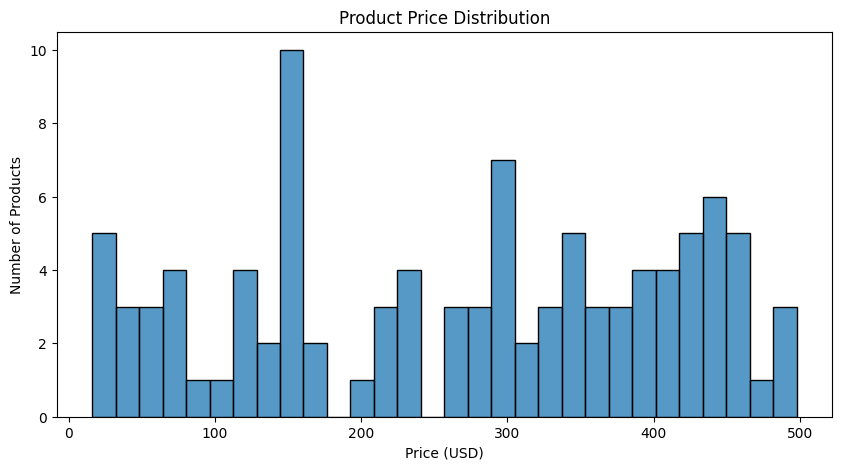

In [142]:
plt.figure(figsize=(10, 5))
sns.histplot(products['Price'], bins=30)
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products')
plt.show()

**Top Selling Products**

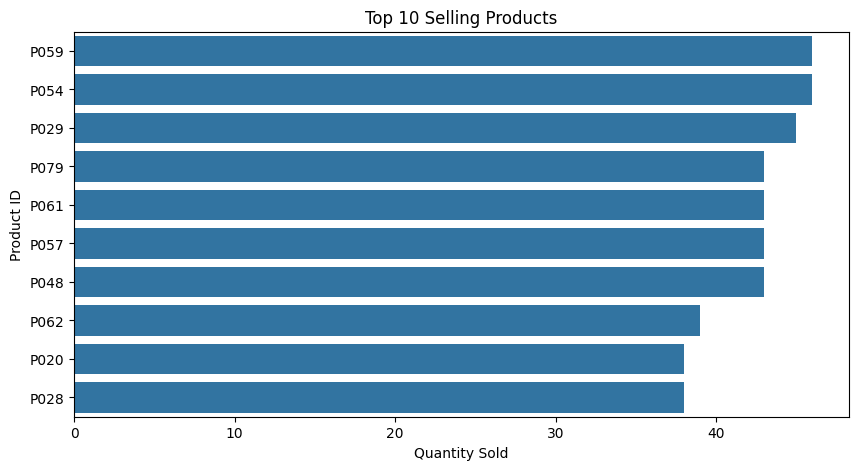

In [143]:
top_selling_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_selling_products.values, y=top_selling_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product ID')
plt.show()

**Customer Purchase Frequency**

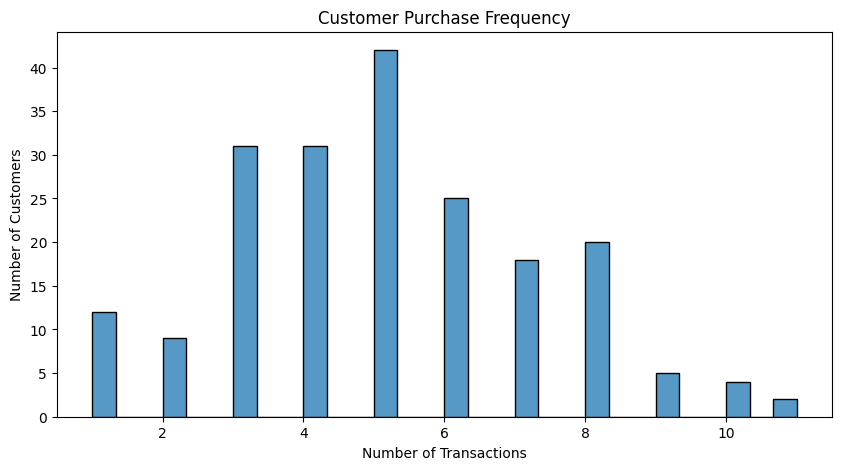

In [144]:
customer_purchase_freq = transactions.groupby('CustomerID')['TransactionID'].count()
plt.figure(figsize=(10, 5))
sns.histplot(customer_purchase_freq, bins=30)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

**Region-wise Sales**

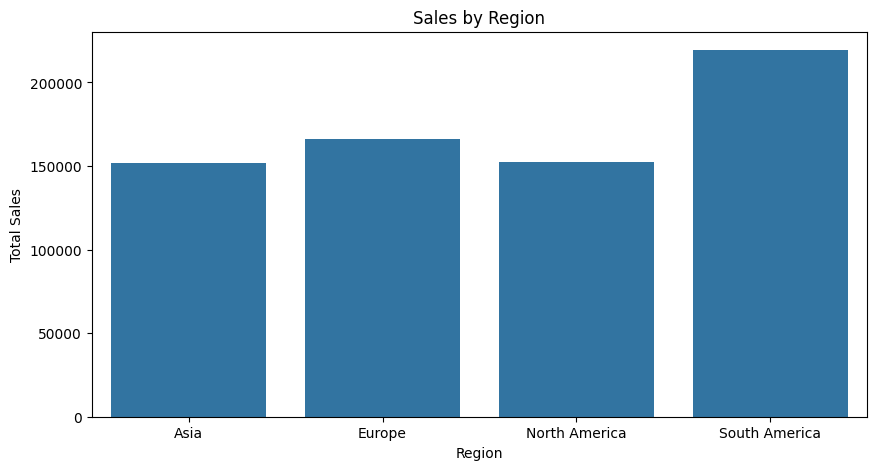

In [145]:
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

**Business Insights**

In [146]:
insights = [
    "Top selling product category: " + products.groupby('Category')['ProductID'].count().idxmax(),
    "Average order value: ${:.2f}".format(transactions['TotalValue'].mean()),
    "Most frequent purchase region: " + transactions.merge(customers, on='CustomerID')['Region'].value_counts().idxmax(),
    "Customers with highest purchase frequency tend to have higher average order value.",
    "There is a significant variation in sales across different regions."
]

In [147]:
for insight in insights:
    print(insight)

Top selling product category: Books
Average order value: $690.00
Most frequent purchase region: South America
Customers with highest purchase frequency tend to have higher average order value.
There is a significant variation in sales across different regions.
